# Задание

У каждого есть свой набор данный, который можно найти в ведомости на вкладке "Линейная регрессия":

https://clck.ru/32AKdJ

Скачиваете свой датасет с kaggle (для этого нужно авторизоваться с гугл аккаунт и скачать датасет).

Ваша задача:
1. Исследовать данные
2. Построить модель линейной регрессии по своему набору данных
3. Получить коэффиценты уравнения линейной регрессии
4. Написать уравнение линейной регрессии
5. Визуализировать данные и полученное уравнение линейной регрессии
6. Оценивать полученную модель с помощью MSE, MAE, R2.
7. Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE и почему), привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("weatherHistory.csv")

Saving weatherHistory.csv to weatherHistory.csv


Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


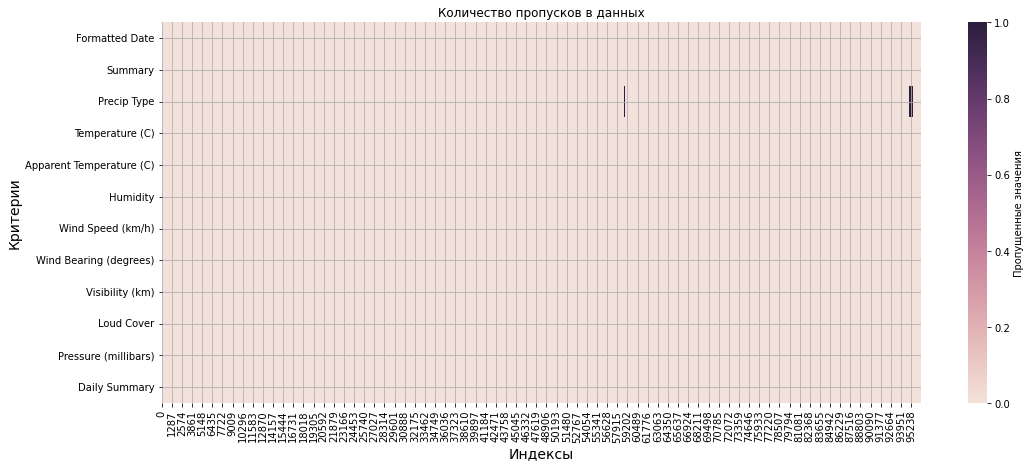

In [ ]:
print(df.isna().sum())
plt.figure(figsize=(17,7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Пропущенные значения'})
plt.xlabel("Индексы", fontsize=14)  
plt.ylabel("Критерии", fontsize=14)
plt.title("Количество пропусков в данных")
plt.grid()
plt.show()
     

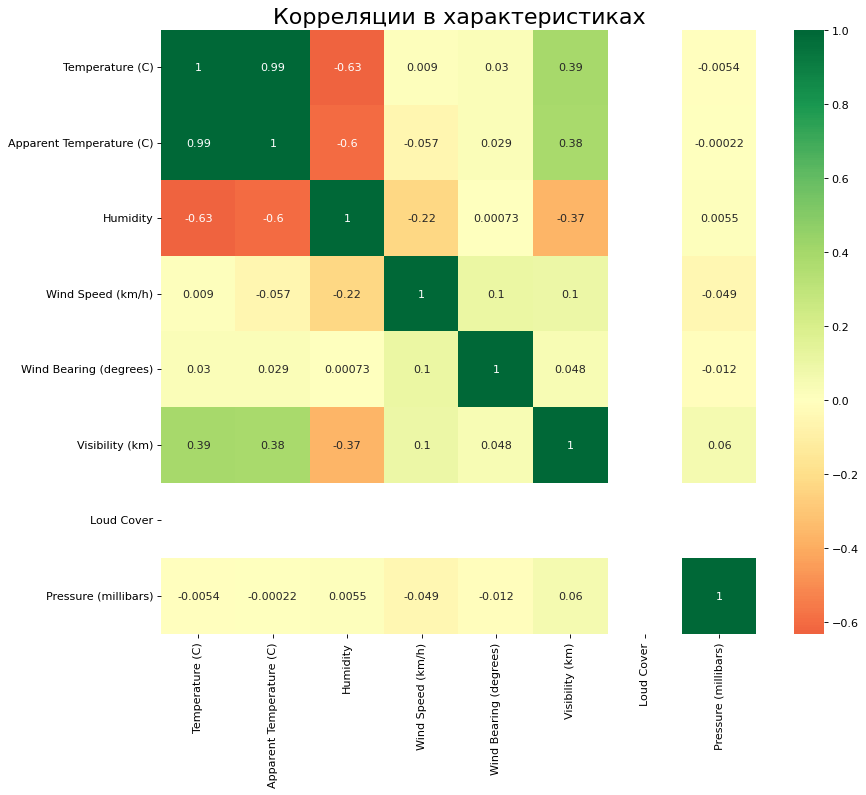

In [ ]:

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

In [ ]:
y = df['Humidity']
x = df.drop(columns='Humidity')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
w0 = model.intercept_
w1 = model.coef_
print(w0, w1)

AttributeError: ignored

In [ ]:
ans = str(w0)
for i in range(13):
  ans = ans + ' + ' + str(w1[i]) + f' * x{i+1}'
print(ans)

In [ ]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
for col in X_test.columns:
  plt.scatter(X_test[col], y_test)
  plt.scatter(X_test[col], y_pred, color='red', s=10)
  plt.show()

In [ ]:
mas = []
i = 0
for key in X_train.keys():
  mas.append((key, w1[i]))
  i += 1
mas.sort(key=lambda x: abs(x[1]))
mas